In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Load data 

In [5]:
Amason_sales_data = pd.read_csv(r"C:\Users\steph\OneDrive\Documents\Desktop\Amazon sales data\amazon_sales_data 2025.csv")

In [ ]:
# Show first few rows

In [7]:
Amason_sales_data.head()

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-2025,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-2025,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-2025,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-2025,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-2025,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending


In [ ]:
# Dataset Summary

In [9]:
Amason_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Order ID           250 non-null    object
 1   Date               250 non-null    object
 2   Product            250 non-null    object
 3   Category           250 non-null    object
 4   Price              250 non-null    int64 
 5   Quantity           250 non-null    int64 
 6   Total Sales        250 non-null    int64 
 7   Customer Name      250 non-null    object
 8   Customer Location  250 non-null    object
 9   Payment Method     250 non-null    object
 10  Status             250 non-null    object
dtypes: int64(3), object(8)
memory usage: 21.6+ KB


In [11]:
## Checking the correct Date format

In [13]:
Amason_sales_data["Date"] = pd.to_datetime(Amason_sales_data["Date"],format="%d-%m-%Y")

In [15]:
## Rename Columns for Clarity

In [17]:
Amason_sales_data.rename(columns={Amason_sales_data.columns[1]:"Order_Date"},inplace=True)

In [19]:
Amason_sales_data["Order_Date"] = pd.to_datetime(Amason_sales_data["Order_Date"],errors = "coerce")

In [ ]:
# Converts string to datetime object. errors="coerce" replaces invalid formats with NaT (null),
# which is then dropped in step 1.

In [21]:
Amason_sales_data["Order_Date"].head()

0   2025-03-14
1   2025-03-20
2   2025-02-15
3   2025-02-19
4   2025-03-10
Name: Order_Date, dtype: datetime64[ns]

In [ ]:
#  Strip Whitespaces from All Object Columns
# Why: Removes leading/trailing whitespace that may cause grouping errors or
# mismatched filtering in Power BI.



In [27]:
Amason_sales_data=Amason_sales_data.apply(lambda x:x.str.strip() if x.dtype== "object" else x)

,Order ID,Order_Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,2025-03-14,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,2025-03-20,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,2025-02-15,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,2025-02-19,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,2025-03-10,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending
...,...,...,...,...,...,...,...,...,...,...,...
245,ORD0246,2025-03-17,T-Shirt,Clothing,20,2,40,Daniel Harris,Miami,Debit Card,Cancelled
246,ORD0247,2025-03-30,Jeans,Clothing,40,1,40,Sophia Miller,Dallas,Debit Card,Cancelled
247,ORD0248,2025-03-05,T-Shirt,Clothing,20,2,40,Chris White,Denver,Debit Card,Cancelled
248,ORD0249,2025-03-08,Smartwatch,Electronics,150,3,450,Emily Johnson,New York,Debit Card,Cancelled


In [ ]:
# Standardize Column Names
# Result: Avoids syntax errors in Power BI and Python due to inconsistent or
# space-containing column headers.

In [29]:
Amason_sales_data.columns = Amason_sales_data.columns.str.strip().str.replace(" ","_") # for column name 

In [31]:
Amason_sales_data.columns

Index(['Order_ID', 'Order_Date', 'Product', 'Category', 'Price', 'Quantity',
       'Total_Sales', 'Customer_Name', 'Customer_Location', 'Payment_Method',
       'Status'],
      dtype='object')

In [ ]:
# Dropping Null/Empty Rows
# Reason: These are essential columns for time series, sales aggregation, 
# and trend visualization. Missing values here would disrupt EDA and Power BI integration.

In [33]:
Amason_sales_data.dropna(subset=['Order_Date', 'Price', 'Quantity', 'Total_Sales'], inplace=True)


In [35]:
Amason_sales_data.to_csv("cleaned_amazon_sales.csv",index=False) # this cleaned data  for PowerBI Analysis 

In [37]:
## Exploratory Data Analysis (EDA)

In [39]:
import pandas as pd

In [41]:
import matplotlib.pyplot as plt

In [42]:
import seaborn as sns

In [43]:
## 1.best performing product categories

In [44]:
best_product_categories = Amason_sales_data.groupby("Category")[["Total_Sales"]].sum().sort_values(by = "Total_Sales",ascending=False)

In [45]:
best_product_categories

,Total_Sales
Category,
Electronics,129950
Home Appliances,105000
Footwear,4320
Clothing,3540
Books,1035


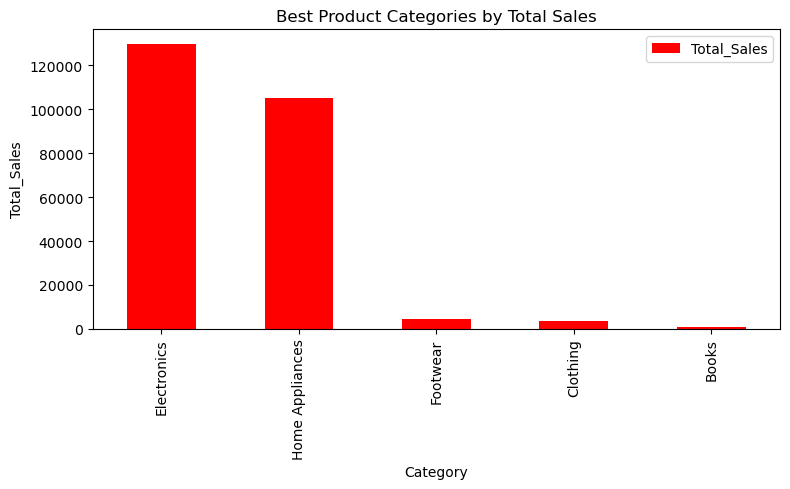

In [47]:
best_product_categories.plot(kind = "bar",color ="Red",figsize=(8,5))
plt.xlabel("Category")
plt.ylabel("Total_Sales")
plt.title("Best Product Categories by Total Sales")
plt.tight_layout()
plt.show()

In [48]:
## 2.Sales Trend Over Time

In [49]:
daily_sales = Amason_sales_data.groupby("Order_Date")["Total_Sales"].sum().sort_index()

In [50]:
daily_sales 

Order_Date
2025-02-02     3600
2025-02-03     3360
2025-02-04     6815
2025-02-05     5400
2025-02-06    11400
2025-02-07     2520
2025-02-08     1640
2025-02-09     3550
2025-02-10    10965
2025-02-11     3550
2025-02-12     3560
2025-02-13     4860
2025-02-14     1015
2025-02-15      520
2025-02-16     9540
2025-02-17     1005
2025-02-18     8810
2025-02-19     2195
2025-02-20     6730
2025-02-21     4600
2025-02-22     1800
2025-02-23     2570
2025-02-24     6900
2025-02-25     6300
2025-02-26     1980
2025-02-27      300
2025-02-28     7210
2025-03-01     1800
2025-03-02     4575
2025-03-03      120
2025-03-04     5900
2025-03-05     2900
2025-03-06     9720
2025-03-07     8660
2025-03-08     3125
2025-03-09      200
2025-03-10     3965
2025-03-11     1240
2025-03-12      710
2025-03-13     4160
2025-03-14     4350
2025-03-15     7190
2025-03-16     2735
2025-03-17      540
2025-03-18     3700
2025-03-19     4115
2025-03-20     3630
2025-03-21     1960
2025-03-22      950
2025-03-2

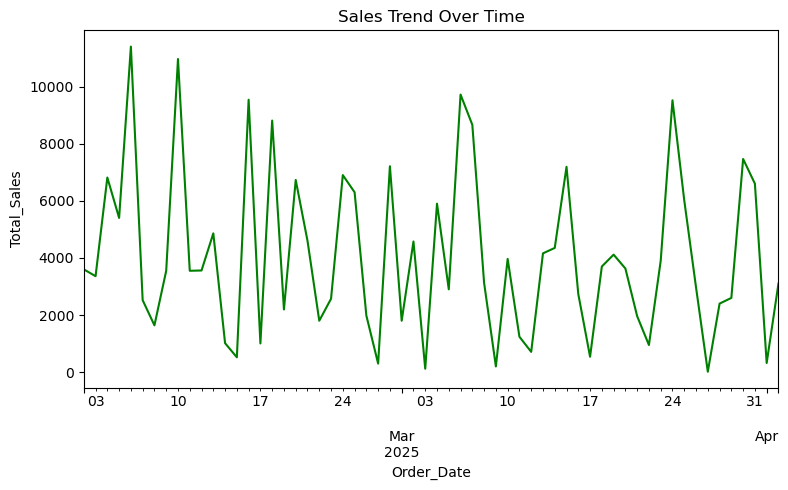

In [51]:
daily_sales.plot(kind = "line",color = "Green",figsize= (8,5))
plt.xlabel("Order_Date")
plt.ylabel("Total_Sales")
plt.title("Sales Trend Over Time")
plt.tight_layout()
plt.show()

In [52]:
## 3.Sales By location

In [55]:
 Amason_sales_data.columns

Index(['Order_ID', 'Order_Date', 'Product', 'Category', 'Price', 'Quantity',
       'Total_Sales', 'Customer_Name', 'Customer_Location', 'Payment_Method',
       'Status'],
      dtype='object')

In [73]:
sales_location =  Amason_sales_data.groupby("Customer_Location")[["Total_Sales"]].sum().sort_values("Total_Sales",ascending=False)

In [75]:
sales_location

,Total_Sales
Customer_Location,
Miami,31700
Denver,29785
Houston,28390
Dallas,27145
Seattle,26890
Boston,26170
Chicago,20810
New York,18940
Los Angeles,17820


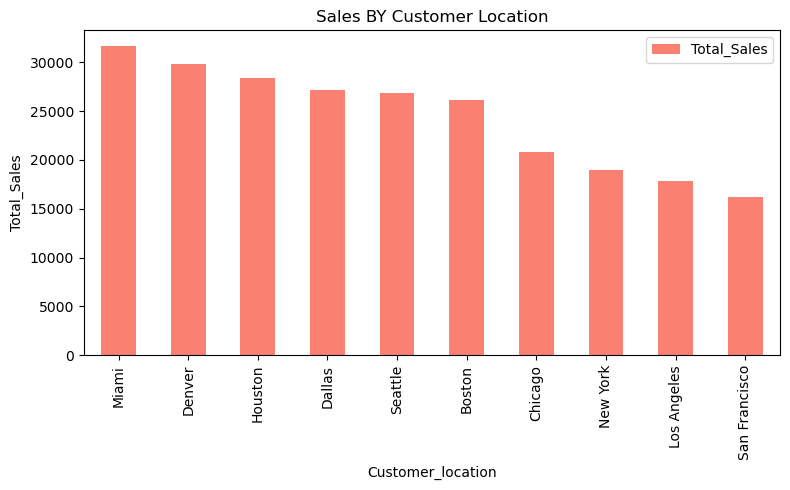

In [101]:
sales_location.plot(kind = "bar",color = "salmon",figsize=(8,5))
plt.xlabel("Customer_location")
plt.title("Sales BY Customer Location")
plt.ylabel("Total_Sales")
plt.tight_layout()
plt.show()

In [ ]:
## 4.Top Products by Sales:

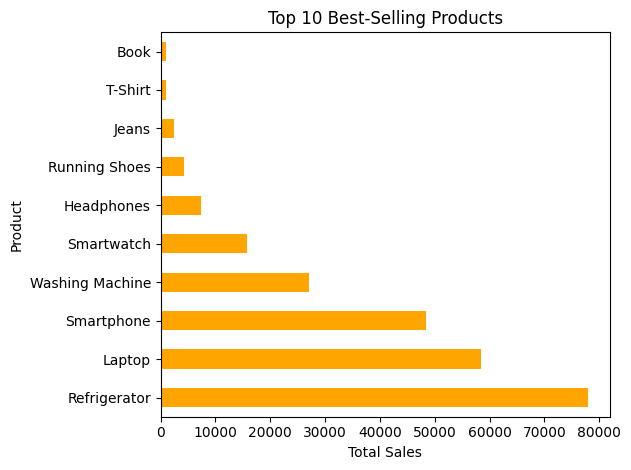

In [71]:
top_products = Amason_sales_data.groupby("Product")["Total_Sales"].sum().sort_values(ascending=False).head(10)
top_products.plot(kind="barh", color="orange")
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Total Sales")
plt.tight_layout()
plt.show()

In [ ]:
# 5.Payment Method Preference:


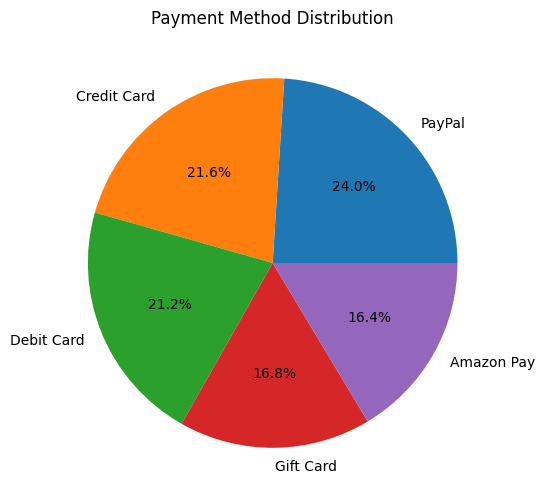

In [72]:
Amason_sales_data["Payment_Method"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(6,6))
plt.title("Payment Method Distribution")
plt.ylabel("")
plt.show()

In [ ]:
# 6.Order Status Breakdown:

In [73]:
import seaborn as sns

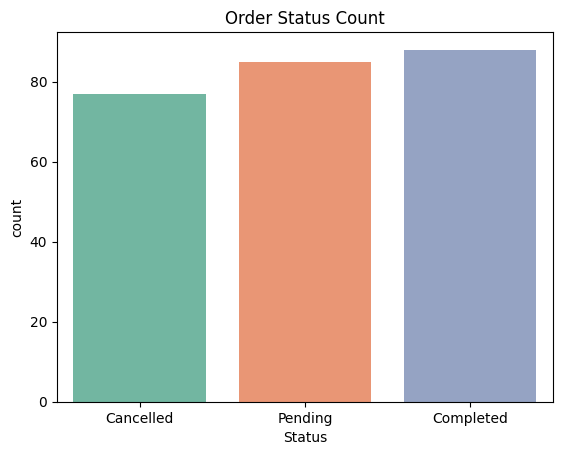

In [75]:
sns.countplot(data=Amason_sales_data, x="Status", hue="Status", palette="Set2", legend=False)
plt.title("Order Status Count")
plt.show()

In [ ]:
## 7.Order Status Distribution

In [103]:
Amason_sales_data.columns

Index(['Order_ID', 'Order_Date', 'Product', 'Category', 'Price', 'Quantity',
       'Total_Sales', 'Customer_Name', 'Customer_Location', 'Payment_Method',
       'Status'],
      dtype='object')

In [105]:
Amason_sales_data["Status"].value_counts()

Status
Completed    88
Pending      85
Cancelled    77
Name: count, dtype: int64

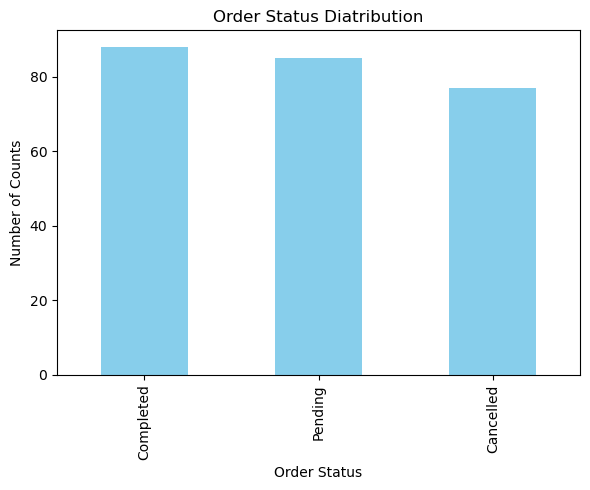

In [119]:
Amason_sales_data["Status"].value_counts().plot(kind = "bar",figsize=(6,5),color ="skyblue")
plt.xlabel("Order Status")
plt.ylabel("Number of Counts")
plt.title("Order Status Diatribution")
plt.tight_layout()
plt.show()

In [ ]:
### Statistical Insights with scipy and statsmodels

In [246]:
import pandas as pd 

In [248]:
import seaborn as sns

In [250]:
import matplotlib.pyplot as plt

In [ ]:
### correlation Matrix

In [252]:
cor = Amason_sales_data[["Price", "Quantity", "Total_Sales"]].corr()

In [254]:
cor

,Price,Quantity,Total_Sales
Price,1.000000,-0.010858,0.846673
Quantity,-0.010858,1.000000,0.332444
Total_Sales,0.846673,0.332444,1.000000


# +1 = Perfect Positive Correlation,As price        increases, total sales also tend  # to increas.      logical, because Total_Sales = Price × Quantity

# 0 = No Correlation

# –1 = Perfect Negative Correlation

# Price and Quantity aren't related	A product's      price doesn't influence how many are bought      in this dataset

In [ ]:
#In this data, Total Sales depends more on Price than Quantity, and Price doesn’t affect Quantity bought.

In [ ]:
# by heat map we can see clearly

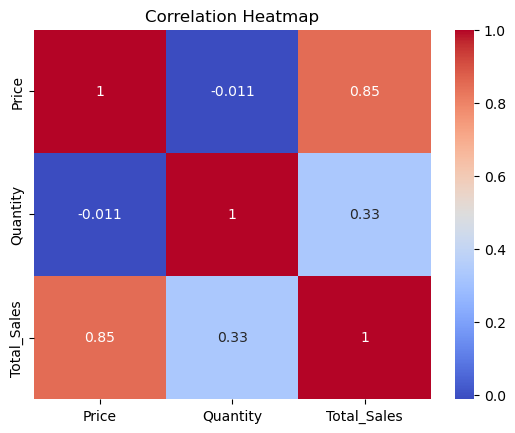

In [256]:
sns.heatmap(cor,annot=True,cmap="coolwarm") #  annot=True   This means annotate the cells — display the numeric values (correlation coefficients) inside each box.
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# ANOVA: Are Total Sales significantly different between categories?

In [258]:
from scipy import stats

In [ ]:
# Grouping sales by category

In [260]:
Amason_sales_data.columns

Index(['Order_ID', 'Order_Date', 'Product', 'Category', 'Price', 'Quantity',
       'Total_Sales', 'Customer_Name', 'Customer_Location', 'Payment_Method',
       'Status'],
      dtype='object')

In [264]:
sales_category = [group["Total_Sales"].values for name,group in Amason_sales_data.groupby("Category")]

In [266]:
sales_category

[array([30, 15, 75, 15, 15, 15, 75, 45, 15, 75, 75, 75, 45, 15, 60, 15, 15,
        15, 75, 75, 15, 75, 30, 60, 15], dtype=int64),
 array([ 20,  60, 160,  20,  20, 100,  80,  40, 100, 120,  80, 100, 200,
         40, 200,  40,  60, 120, 200,  20,  60, 200,  80,  20,  80,  40,
        200,  40, 100,  20, 160, 160, 200,  80,  80,  80,  40,  40,  40,
         40], dtype=int64),
 array([ 400,  450,  600,  500,  500, 1600,  600, 1000,  400,  300,  100,
         500,  500, 2000, 2400,  300, 2400, 1600,  150,  300,  150, 2000,
        2400,  450,  300,  500,  500,  300, 4000, 2500,  300,  300,  100,
         750, 2400, 2500,  200,  200,  300,  300, 1500, 2500,  750,  750,
        3200, 1000,  600,  450,  300, 1000,  200, 2500, 3200, 3200,  500,
        1000, 4000,  500, 2400,  500,  300,  750, 1000,  800, 2500,  450,
         750, 1600,  300, 1000, 1500,  300,  300,  400,  150,  750,  200,
         600, 1500, 2400,  100, 1000,  750, 4000,  800,  300,  300, 1500,
        2400, 2400,  300, 1500

In [270]:
f_stat,p_val = stats.f_oneway(*sales_category)      # Or anova_result = stats.f_oneway(*category_groups)
                                                    # print("ANOVA F-statistic:", anova_result.statistic)
                                                    # print("ANOVA p-value:", anova_result.pvalue)

In [276]:
print("f_statistics:",f_stat)
print("p_value:",p_val)

f_statistics: 53.463921351737696
p_value: 2.4079237572585064e-32


In [294]:
if p_val<0.05:
    print("Significant difference found between categories.")
else:
    print("no Significant difference found between categories.")



Significant difference found between categories.


In [317]:
import statsmodels.api as sm

In [319]:
 #  Linear Regression: Predict Total Sales using Price & Quantity


In [ ]:
# Predicting sales from price and quantity linear Regression is useful

In [321]:
X = Amason_sales_data[["Price","Quantity"]]

In [323]:
Y = Amason_sales_data["Total_Sales"]

In [327]:
X = sm.add_constant(X) ## Add Constant(intercept)

In [329]:
model = sm.OLS(Y,X).fit()

In [331]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Total_Sales   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     618.6
Date:                Fri, 30 May 2025   Prob (F-statistic):           6.56e-97
Time:                        21:43:36   Log-Likelihood:                -1913.2
No. Observations:                 250   AIC:                             3832.
Df Residuals:                     247   BIC:                             3843.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -840.4835     78.556    -10.699      0.0

In [ ]:
#I used linear regression to predict Total Sales based on Price and Quantity. 
#The model had high accuracy (R² = 0.834), 
# showing that these two features strongly influence sales. 
# I used statsmodels in Python to find this and both variables were statistically significant.